In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [26]:
def aggregate_predsV2(fold_preds):
    fold_preds = pd.read_csv(fold_preds+"/preds.csv")
    aggregate_pred = fold_preds['0']
    acc = [None] * 10
    mse = [None] * 10
    for i in range(0,10):
        acc[i] = accuracy_score(fold_preds[str(i)].round().astype("int"), y_true.age)
        mse[i] = mean_squared_error(fold_preds[str(i)], y_true.age)
        if i >= 1:
            aggregate_pred += fold_preds[str(i)]

    aggregate_pred = aggregate_pred/10.0    
    acc_mean = accuracy_score(aggregate_pred.round().astype("int"), y_true.age)
    mse_mean = mean_squared_error(aggregate_pred, y_true.age)
    print(str(acc_mean) + " " + str(mse_mean))
    return acc, acc_mean, mse, mse_mean, aggregate_pred

def aggregate_predsV1(fold_preds):
    t = [None] * 10
    for i in range(0,10):
        t[i] = pd.read_csv(fold_preds+"/test_set_"+str(i)+".csv") 
    
    acc = [None] * 10
    mse = [None] * 10
    aggregate_pred = t[0].y_pred_test.values
    for i in range(0,10):
        acc[i] = accuracy_score(t[i].y_pred_test.values.round().astype("int"), t[0].y_true)
        mse[i] = mean_squared_error(t[i].y_pred_test.values, t[0].y_true)
        if i >= 1:
            aggregate_pred += t[i].y_pred_test.values

    aggregate_pred = aggregate_pred/10.0
    acc_mean = accuracy_score(aggregate_pred.round().astype("int"), t[0].y_true)
    mse_mean = mean_squared_error(aggregate_pred, t[0].y_true)
    print(str( acc_mean ) + " "+ str( mse_mean ) ) 
    return acc, acc_mean, mse, mse_mean, aggregate_pred
    
y_true = pd.read_csv("EFFNetV2_l_MLP_all/test_set_files.csv")

print("aggregate accuracy, mse")


lAllAcc, lAllAccMean, lAllMSE, lAllMSEMean, l_all = aggregate_predsV2( "EFFNetV2_l_MLP_all" )
lMiddleAcc, lMiddleAccMean, lMiddleMSE, lMiddleMSEMean, l_middle = aggregate_predsV2( "EFFNetV2_l_MLP_middle" )

mMinAcc, mMinAccMean, mMinMSE, mMinMSEMean, m_min = aggregate_predsV2( "EFFNetV2_m_min_mse" )
mMiddleAcc, mMiddleAccMean, mMiddleMSE, mMiddleMSEMean, m_middle = aggregate_predsV2( "EFFNetV2_m_middle_mse" )
mMaxAcc, mMaxAccMean, mMaxMSE, mMaxMSEMean, m_max = aggregate_predsV2( "EFFNetV2_m_max_mse" )
mAllAcc, mAllAccMean, mAllMSE, mAllMSEMean, m_all = aggregate_predsV2( "EFFNetV2_m_MLP_all" )

B4MinAcc, B4MinAccMean, B4MinMSE, B4MinMSEMean, b4_min = aggregate_predsV1( "tf_EFFNetB4_groupkfold_stdScalar_10_test2" )
B4MiddleAcc, B4MiddleAccMean, B4MiddleMSE, B4MiddleMSEMean, b4_middle = aggregate_predsV1( "EFFNetB4_groupkfold_stdScalar_middle" )
B4MaxAcc, B4MaxAccMean, B4MaxMSE, B4MaxMSEMean, b4_max = aggregate_predsV1( "EFFNetB4_groupkfold_stdScalar_max" )

B5MinAcc, B5MinAccMean, B5MinMSE, B5MinMSEMean, b5_min = aggregate_predsV1( "tf_EFFNetB5_2_groupkfold_stdScalar_10_test_min" )

B6MinAcc, B6MinAccMean, B6MinMSE, B6MinMSEMean, b6_min = aggregate_predsV1( "tf_EFFNetB6_groupkfold_stdScalar_10_test_min" )
B6MiddleAcc, B6MiddleAccMean, B6MiddleMSE, B6MiddleMSEMean, b6_middle = aggregate_predsV1( "tf_EFFNetB6_groupkfold_stdScalar_10_test_middle" )
B6MaxAcc, B6MaxAccMean, B6MaxMSE, B6MaxMSEMean, b6_max = aggregate_predsV1( "EFFNetB6_groupkfold_stdScalar_10_test_max" )
#l_all,l_middle,m_min,m_middle,m_max,m_all,b4_min,b4_middle,b4_max,b5_min,b6_min,b6_middle,b6_max

aggregate accuracy, mse
0.7165048543689321 0.2812634011698365
0.7184466019417476 0.27972858674427004
0.7398058252427184 0.2733061445705727
0.7242718446601941 0.29181617978158675
0.7106796116504854 0.28988731306984655
0.7398058252427184 0.2728000533332227
0.7281553398058253 0.27677442836796534
0.7145631067961165 0.2847701138075624
0.7087378640776699 0.2908639084032022
0.7436893203883496 0.2770159431240281
0.7339805825242719 0.272170267061415
0.7436893203883496 0.2622701387186297
0.7145631067961165 0.30471818752107327


### Summary over all models

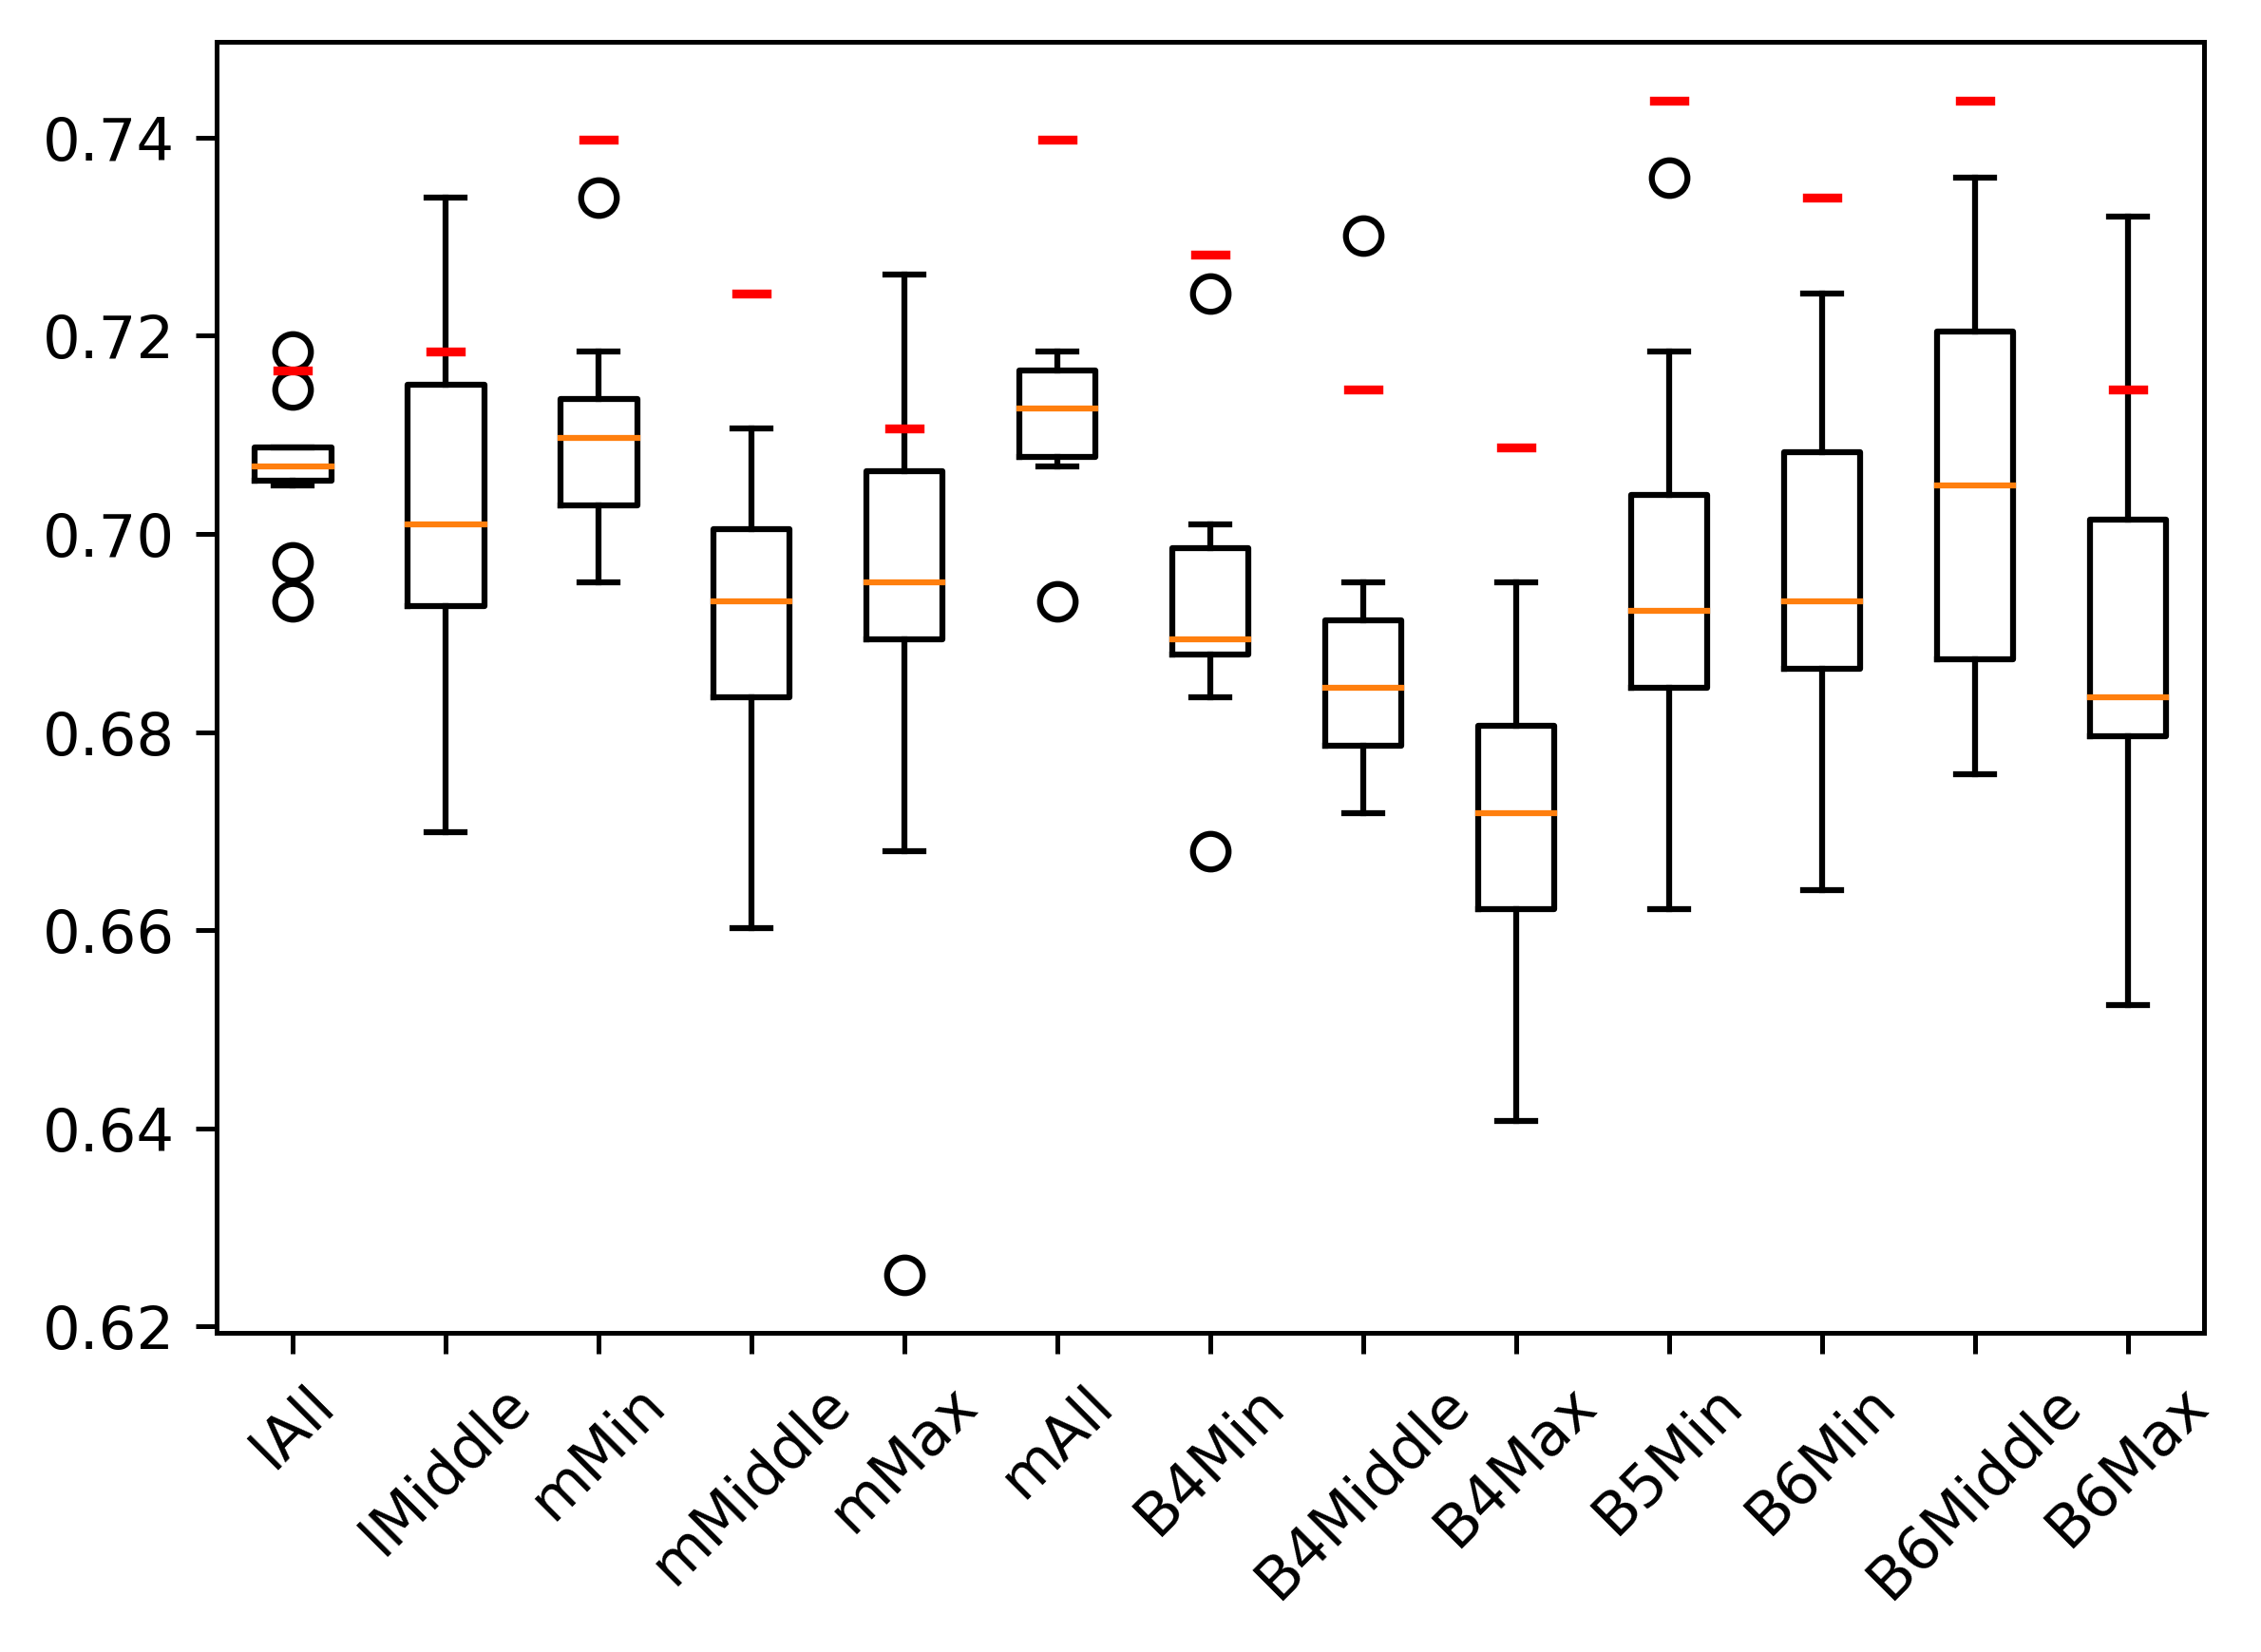

In [18]:
#l_all,l_middle,m_min,m_middle,m_max,m_all,b4_min,b4_middle,b4_max,b5_min,b6_min,b6_middle,b6_max
plt.boxplot([lAllAcc, lMiddleAcc, mMinAcc, mMiddleAcc, mMaxAcc, mAllAcc, B4MinAcc, B4MiddleAcc, B4MaxAcc, 
             B5MinAcc, B6MinAcc, B6MiddleAcc, B6MaxAcc])
plt.plot([0.9, 1.1], [lAllAccMean, lAllAccMean], 'r')
plt.plot([1.9, 2.1], [lMiddleAccMean, lMiddleAccMean], 'r')
plt.plot([2.9, 3.1], [mMinAccMean, mMinAccMean], 'r')
plt.plot([3.9, 4.1], [mMiddleAccMean, mMiddleAccMean], 'r')
plt.plot([4.9, 5.1], [mMaxAccMean, mMaxAccMean], 'r')
plt.plot([5.9, 6.1], [mAllAccMean, mAllAccMean], 'r')
plt.plot([6.9, 7.1], [B4MinAccMean, B4MinAccMean], 'r')
plt.plot([7.9, 8.1], [B4MiddleAccMean, B4MiddleAccMean], 'r')
plt.plot([8.9, 9.1], [B4MaxAccMean, B4MaxAccMean], 'r')
plt.plot([9.9, 10.1], [B5MinAccMean, B5MinAccMean], 'r')
plt.plot([10.9, 11.1], [B6MinAccMean, B6MinAccMean], 'r')
plt.plot([11.9, 12.1], [B6MiddleAccMean, B6MiddleAccMean], 'r')
plt.plot([12.9, 13.1], [B6MaxAccMean, B6MaxAccMean], 'r')
plt.xticks(range(1,14), ["lAll","lMiddle","mMin","mMiddle","mMax","mAll","B4Min","B4Middle","B4Max"
                         ,"B5Min","B6Min","B6Middle","B6Max"], rotation = 45)

plt.show()

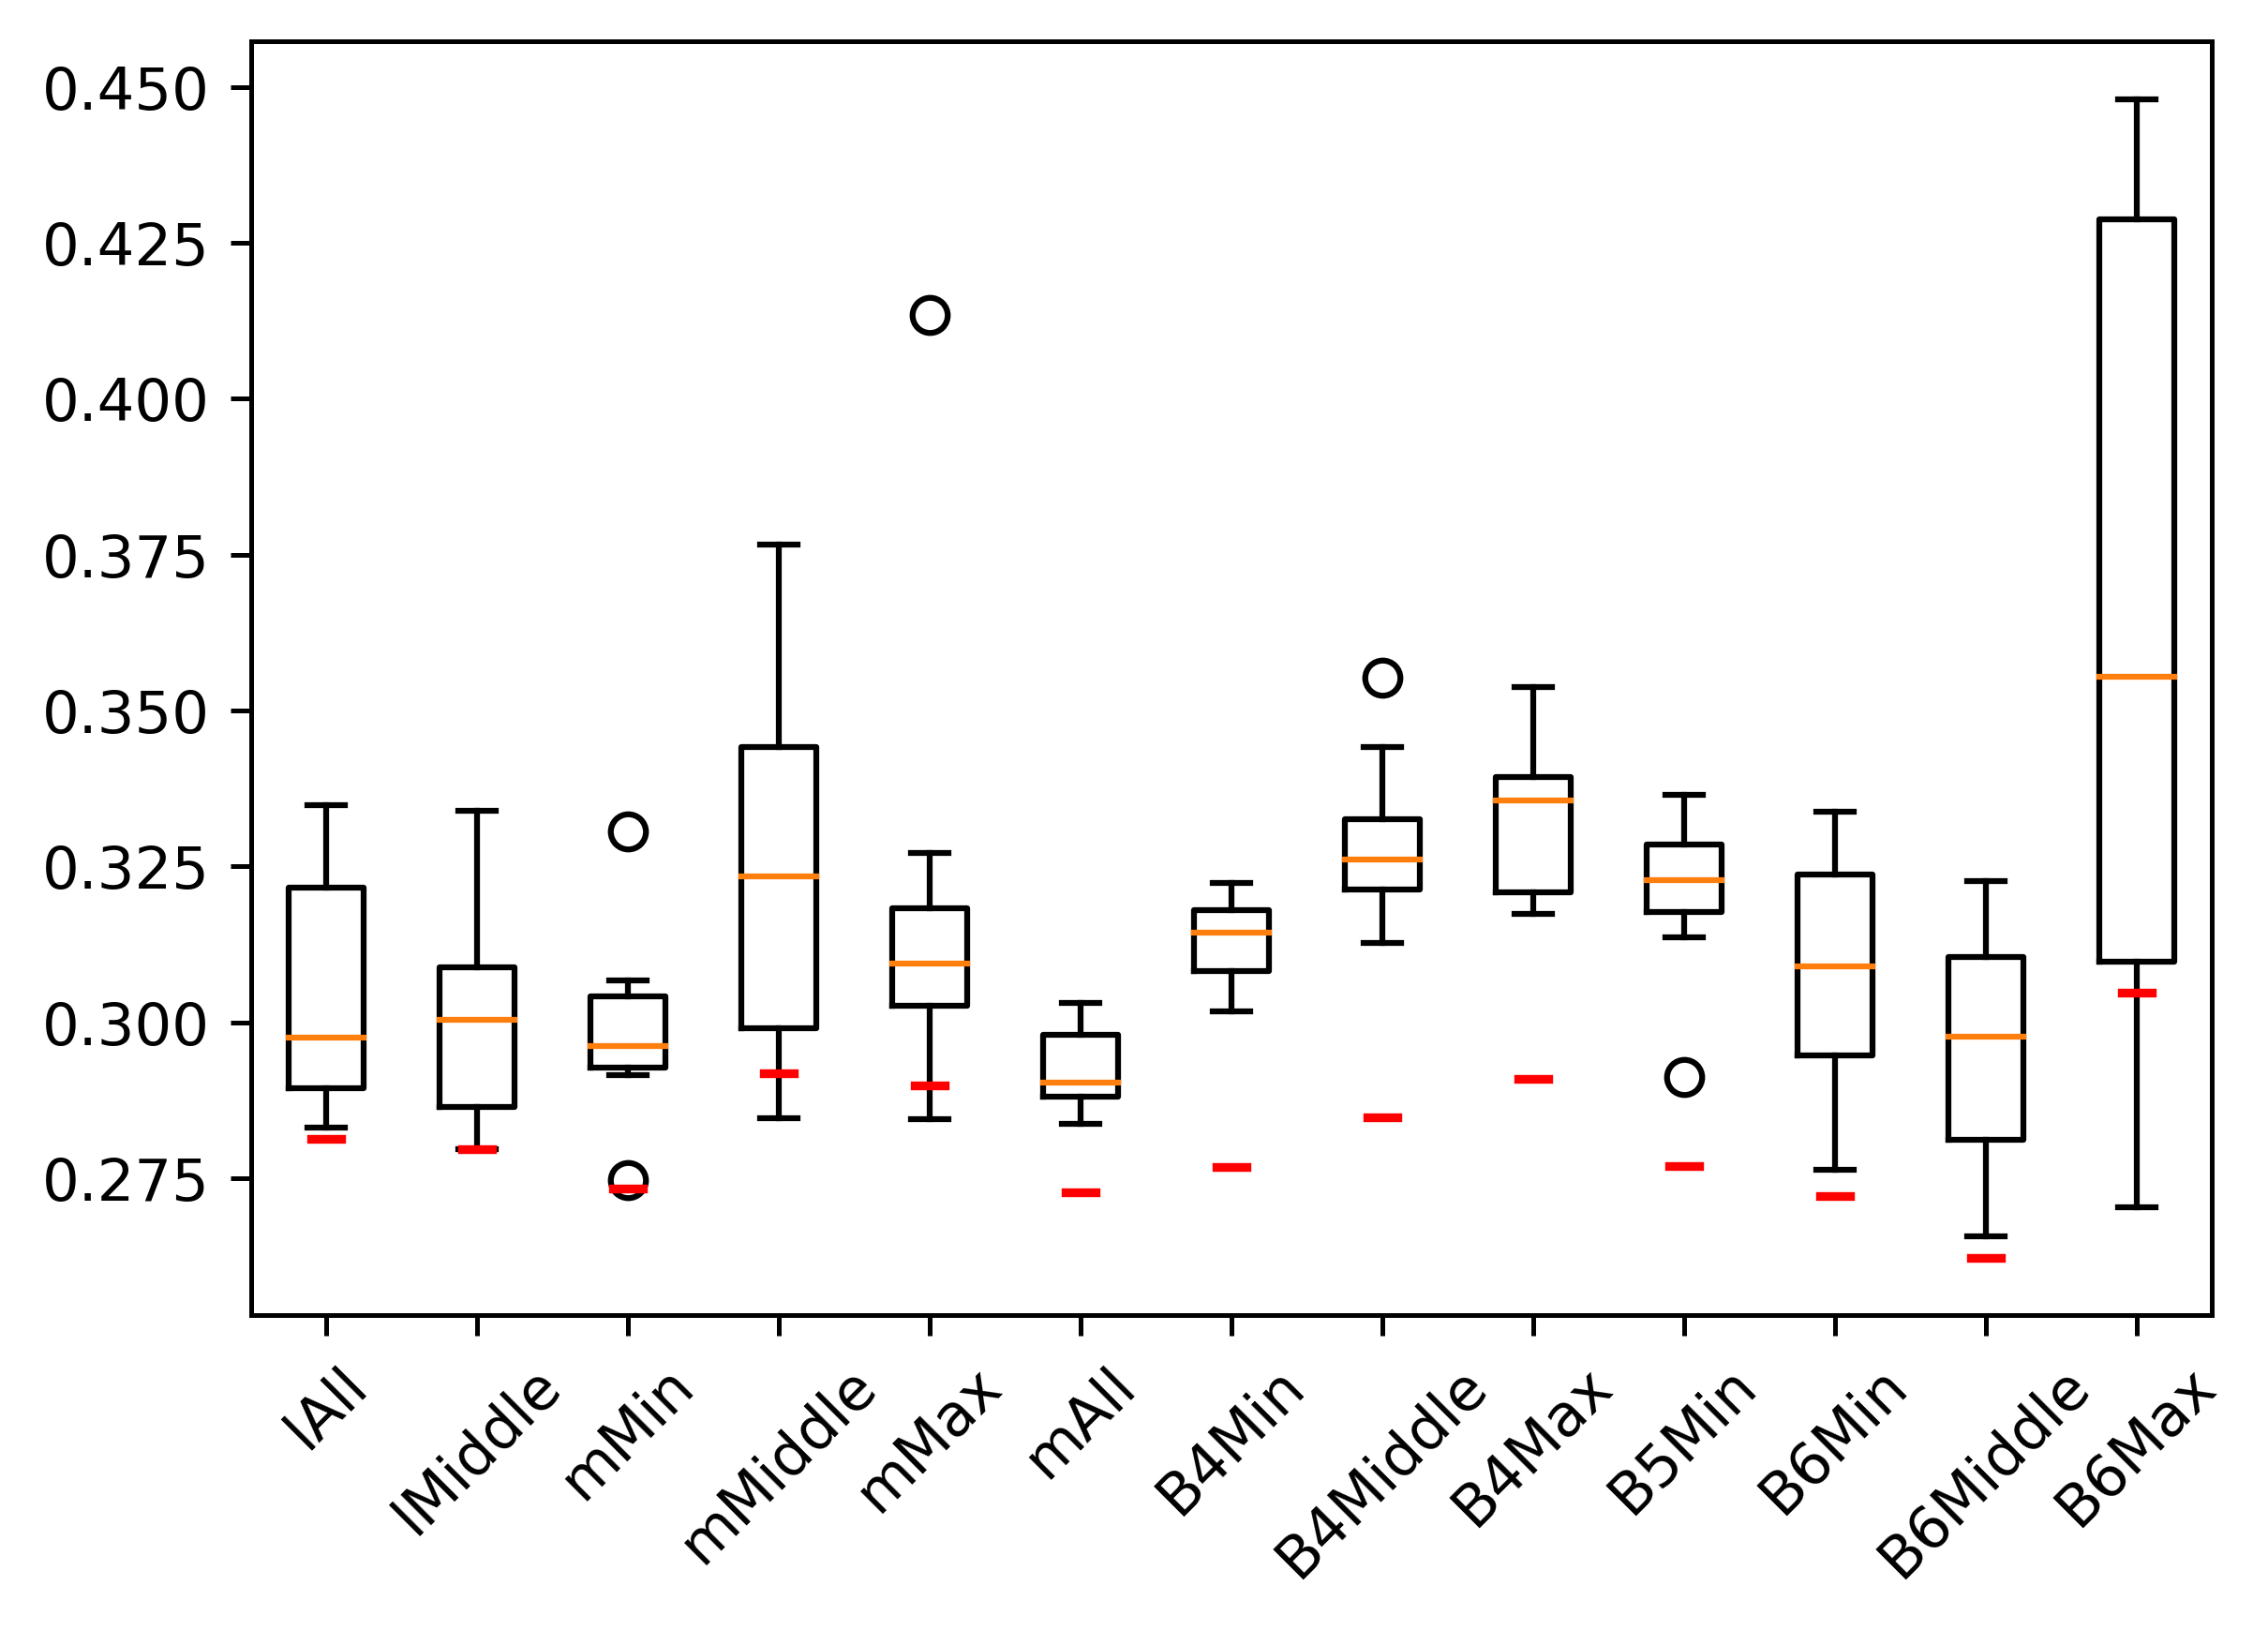

In [27]:
#l_all,l_middle,m_min,m_middle,m_max,m_all,b4_min,b4_middle,b4_max,b5_min,b6_min,b6_middle,b6_max
plt.boxplot([lAllMSE, lMiddleMSE, mMinMSE, mMiddleMSE, mMaxMSE, mAllMSE, B4MinMSE, B4MiddleMSE, B4MaxMSE, 
             B5MinMSE, B6MinMSE, B6MiddleMSE, B6MaxMSE])
plt.plot([0.9, 1.1], [lAllMSEMean, lAllMSEMean], 'r')
plt.plot([1.9, 2.1], [lMiddleMSEMean, lMiddleMSEMean], 'r')
plt.plot([2.9, 3.1], [mMinMSEMean, mMinMSEMean], 'r')
plt.plot([3.9, 4.1], [mMiddleMSEMean, mMiddleMSEMean], 'r')
plt.plot([4.9, 5.1], [mMaxMSEMean, mMaxMSEMean], 'r')
plt.plot([5.9, 6.1], [mAllMSEMean, mAllMSEMean], 'r')
plt.plot([6.9, 7.1], [B4MinMSEMean, B4MinMSEMean], 'r')
plt.plot([7.9, 8.1], [B4MiddleMSEMean, B4MiddleMSEMean], 'r')
plt.plot([8.9, 9.1], [B4MaxMSEMean, B4MaxMSEMean], 'r')
plt.plot([9.9, 10.1], [B5MinMSEMean, B5MinMSEMean], 'r')
plt.plot([10.9, 11.1], [B6MinMSEMean, B6MinMSEMean], 'r')
plt.plot([11.9, 12.1], [B6MiddleMSEMean, B6MiddleMSEMean], 'r')
plt.plot([12.9, 13.1], [B6MaxMSEMean, B6MaxMSEMean], 'r')
plt.xticks(range(1,14), ["lAll","lMiddle","mMin","mMiddle","mMax","mAll","B4Min","B4Middle","B4Max"
                         ,"B5Min","B6Min","B6Middle","B6Max"], rotation = 45)

plt.show()

### Ensemble of ensemble

In [ ]:
v2_m = pd.read_csv("preds.csv") #EfficientNetV2 Medium 
v2_l = pd.read_csv("../EFFNetV2_l_MLP_all/preds.csv") 
v2_l = pd.read_csv("../EFFNetV2_l_MLP_all/preds.csv") #EfficientNetV2 large 

b4 = [None] * 10
for i in range(0,10):
  b4[i] = pd.read_csv("../tf_EFFNetB4_groupkfold_stdScalar_10_test2/test_set_"+str(i)+".csv")

b5 = [None] * 10
for i in range(0,10):
  b5[i] = pd.read_csv("../tf_EFFNetB5_2_groupkfold_stdScalar_10_test_min/test_set_"+str(i)+".csv")

b6 = [None] * 10
for i in range(0,10):
  b6[i] = pd.read_csv("../tf_EFFNetB6_groupkfold_stdScalar_10_test_min/test_set_"+str(i)+".csv")

y_true = pd.read_csv("test_set_files.csv") 

a_v2_m = v2_m['0']
for i in range(1,10):
  a_v2_m += v2_m[str(i)]

a_v2_l = v2_l['0']
for i in range(1,10):
  a_v2_l += v2_l[str(i)]

a_b4 = b4[0].y_pred_test
for i in range(1,10):
  a_b4 += b4[i].y_pred_test

a_b5 = b5[0].y_pred_test
for i in range(1,10):
  a_b5 += b5[i].y_pred_test

a_b6 = b6[0].y_pred_test
for i in range(1,10):
  a_b6 += b6[i].y_pred_test

### ALL ###
aggregate = (a_v2_m+a_v2_l+a_b4+a_b5+a_b6)/50.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

# Tuple ensembles:


### Tuples

In [ ]:
#a_v2_m+a_v2_l+a_b4+a_b5+a_b6
aggregate = (a_v2_m+a_v2_l)/20.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_m+a_b4)/20.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_m+a_b5)/20.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_m+a_b6)/20.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_l+a_b4)/20.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_l+a_b5)/20.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_l+a_b6)/20.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_b4+a_b5)/20.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_b5+a_b6)/20.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

### Triplets

In [ ]:
#a_v2_m+a_v2_l+a_b4+a_b5+a_b6
aggregate = (a_v2_m+a_v2_l+a_b4)/30.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_m+a_v2_l+a_b5)/30.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_m+a_v2_l+a_b6)/30.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_l+a_b4+a_b5)/30.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_l+a_b4+a_b6)/30.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_b4+a_b5+a_b6)/30.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

### Quadruples

In [ ]:
#a_v2_m+a_v2_l+a_b4+a_b5+a_b6
aggregate = (a_v2_m+a_v2_l+a_b4+a_b5)/40.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_m+a_v2_l+a_b4+a_b6)/40.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_l+a_b4+a_b5+a_b6)/40.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_m+a_b4+a_b5+a_b6)/40.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

### ensemble of ensemble - accuracy

In [ ]:
import itertools 

ens_all_acc = 0.7592233009708738
ens_all_mse = 0.24691604506270654

ens_B_acc = 0.7611650485436893
ens_B_mse = 0.2480999287149154

ens_Bm_acc = 0.7689320388349514
ens_Bm_mse = 0.2480999287149154

ens1_acc = itertools.chain(b4_min_acc, b5_min_acc, b6_min_acc, v2_m_middle_acc,v2_l_middle_acc, v2_l_all_acc)
ens1_acc = list(ens1_acc)

ens2_acc = itertools.chain(b4_min_acc, b5_min_acc, b6_min_acc)
ens2_acc = list(ens2_acc)

ens3_acc = itertools.chain(b4_min_acc, b5_min_acc, b6_min_acc, v2_m_middle_acc)
ens3_acc = list(ens3_acc)

ens1_mse = itertools.chain(b4_min_mse, b5_min_mse, b6_min_mse, v2_m_middle_mse,v2_l_middle_mse, v2_l_all_mse)
ens1_mse = list(ens1_mse)

ens2_mse = itertools.chain(b4_min_mse, b5_min_mse, b6_min_mse)
ens2_mse = list(ens2_mse)

ens3_mse = itertools.chain(b4_min_mse, b5_min_mse, b6_min_mse, v2_m_middle_mse)
ens3_mse = list(ens3_mse)

plt.boxplot([ens1_acc, ens2_acc, ens3_acc])
plt.plot([0.9, 1.1], [ens_all_acc,ens_all_acc], 'r')
plt.plot([1.9, 2.1], [ens_B_acc,ens_B_acc], 'r')
plt.plot([2.9, 3.1], [ens_Bm_acc,ens_Bm_acc], 'r')

plt.xticks(range(1,4), ['Ensemble of ens all', 'Ensemble of ens Bs', 'Ensemble of ens Bs+m'], rotation = 45)

plt.show()

### ensemble of ensemble - MSE

In [ ]:
plt.boxplot([ens1_mse, ens2_mse, ens3_mse])
plt.plot([0.9, 1.1], [ens_all_mse,ens_all_mse], 'r')
plt.plot([1.9, 2.1], [ens_B_mse,ens_B_mse], 'r')
plt.plot([2.9, 3.1], [ens_Bm_mse,ens_Bm_mse], 'r')

plt.xticks(range(1,4), ['Ensemble of ens all', 'Ensemble of ens Bs', 'Ensemble of ens Bs+m'], rotation = 45)

plt.show()

In [ ]:
```{toggle}

print(pr_age_group[0])
print(np.mean(pr_age_group[0]))
print(np.std(pr_age_group[0]))
print("DDDD")
print(np.percentile(pr_age_group[0], 25) )
print(np.percentile(pr_age_group[0], 50) )
print(np.percentile(pr_age_group[0], 75) )

q1 = np.percentile(pr_age_group[0], 25)
q3 = np.percentile(pr_age_group[0], 75)
print("DDDDDD")
print(len(pr_age_group[0]))
for j in range(len(pr_age_group[0])):
    if pr_age_group[0][j] < q1 or pr_age_group[0][j] > q3:
        print(pr_age_group[0][j])
        
```        

### Excluding min/max prediction by fold pr prediction

In [ ]:
all_preds = pd.DataFrame()
for i in range(1,10):
  all_preds[str(i)] = fold_preds[str(i)]

all_preds.head()
all_preds['new_pred'] =0.0
for index, row in all_preds.iterrows():
    mask = np.logical_or(row == row.max(), row == row.min())
    #print(mask)
    #print(row)
    row_masked = np.ma.masked_array(row, mask = mask)
    #print(row_masked)
    all_preds['new_pred'].iloc[index] = row_masked.mean()
    
all_preds.head()

print("aggregate accuracy, mse")
print(str( accuracy_score(all_preds.new_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(all_preds.new_pred, y_true.age) ))